# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$ Q(w)=\frac{1}{N}[\sum_{i}(y_i - a_i)^2] + \frac{1}{C}\sum_{j=1}^D w_j^2 $$
$$ w_{new} = w_{old} - \alpha grad_w Q(w) $$
$$ grad_wQ(w) = \frac{2}{N}[\sum_{i}X_i(a_i-y_i)] + \frac{2}{C}w $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$ \sigma(x) = \frac{x}{1+exp(-(x,w)}$$
$$ w_{new} = w_{old} - \alpha[\frac{1}{N}\sum_{i}^N (\sigma(x_i)-y_i) +  \frac{2}{C}w]$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$$ Q(w) = ||y - Xw||^2$$
$$ (y - X(X^TX)^{-1}X^Ty) = A$$
$$ 0 = (X^Ty - X^TX(X^TX)^{-1}X^Ty) = X^TA$$
$$ A = 0$$

$$w = (X^TX + \frac{1}{C}I)^{-1}X^Ty$$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$ p_1 = p(y_i == 1|x_i), \ p_0 = p(y_i == 0|x_i)$$
$$ \frac{-p_1}{a(x_i)} + \frac{p_0}{1-a(x_i)} = 0$$
$$ a(x_i) = \frac{p_1}{p_1+p_0} = p_1 $$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***
Мы вводим w0 для того, чтобы нашим решением могла стать любая гиперплоскость, а не только проходящие через начало координат. Если w0 учитывать в регуляризации, то его значение не сможет стать достаточно большим для точного решения.
Таким образом мы ограничиваем множество w0, и следовательно множество плоскостей, которые могут я вляться решением.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [136]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [137]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [138]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [139]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [140]:
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import random
from sklearn import datasets

#def batch_generator(X, y, shuffle=True, batch_size=1):
    
#    Гератор новых батчей для обучения
#    X          - матрица объекты-признаки
#    y_batch    - вектор ответов
#    shuffle    - нужно ли случайно перемешивать выборку
#    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
#    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    
    
    
def my_batch_generator (X, y, my_shuffle=True, batch_size=100): 
    if my_shuffle:
        X, y = shuffle(X, y, random_state=0)
    X_batch = np.zeros(shape=(batch_size, len(X[0])))
    y_batch = np.zeros(shape=batch_size)
    
    for i in range(0, len(X) - batch_size, batch_size):
        X_batch = [X[j] for j in range(i, i+batch_size)]
        y_batch = [y[j] for j in range(i, i+batch_size)]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [177]:
#%% pycodestyle

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


from sklearn.base import BaseEstimator, ClassifierMixin


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=20,
                 model_type='lin_reg', batch_size=1, drag=1):
        """
        batch_generator - функция генератор, которой будем создавать батчи
        batch_size      - количество элементов в батче
        C               - коэф. регуляризации
        alpha           - скорость спуска
        max_epoch       - максимальное количество эпох
        model_type      - тим модели, lin_reg или log_reg
        drag            - коэффициент торможения обучения для улучшения сходимости

        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size
        self.drag = drag

    def calc_loss(self, X_batch, y_batch, test_val=True):
        """
        Считаем функцию потерь по батчу 

        X_batch  - матрица объекты-признаки по батчу
        y_batch  - вектор ответов по батчу
        test_val - является ли тестовой выборкой, если является - добавляет 
                   колонку единиц для учёта w_0
        """
        if (test_val):
            X_batch = self.adds_column_of_ones(X_batch)

        loss = -1
        if (self.model_type == 'lin_reg'):
            arg = [(y_batch[i] - np.dot(self.weights, X_batch[i])) ** 2 for i in range(len(X_batch))]
            loss = sum(arg) / len(y_batch)

        elif (self.model_type == 'log_reg'):
            arg = 0
            for i in range(len(X_batch)):
                s = sigmoid(np.dot(self.weights, X_batch[i]))
                arg += -y_batch[i] * np.log(s) - (1 - y_batch[i]) * np.log(1 - s)
            loss = arg / len(X_batch)

        return loss + sum(self.weights[1:] ** 2) / self.C

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем градиент функции потерь по батчу (то что Вы вывели в задании 1)

        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        """
        res = np.zeros(shape=len(self.weights))
        loss_grad = 0
        if (self.model_type == 'lin_reg'):
            for i in range(len(X_batch)):
                arg = np.dot(self.weights, X_batch[i]) - y_batch[i]
                res += 2 * X_batch[i] * arg / len(X_batch[0]) + 2 * sum(self.weights[1:]) / self.C
            loss_grad = -res / len(X_batch)

        elif (self.model_type == 'log_reg'):
            for i in range(len(X_batch)):
                res += X_batch[i] * (y_batch[i] - sigmoid(np.dot(self.weights, X_batch[i])))
            loss_grad = res / len(X_batch)

        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = (self.weights + self.alpha * new_grad) / (1 + 1 / self.C)
        pass

    def adds_column_of_ones(self, X):
        """
        добавляет колонку единиц для учёта w_0
        """
        a = np.ones(len(X), dtype=int).reshape(len(X), 1)
        X = np.column_stack((a, X))
        return X

    def fit(self, X, y):
        """
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        """
        self.cl_names = np.array(list(map(int, np.unique(y))))
        fit_complete = 0;
        y = [int(y[i]) for i in range(len(y))]
        self.weights = np.array([random.uniform(-0.1, 0.1) for i in range(len(X[0]) + 1)])
        self.result = np.zeros(shape=10000)
        iteration = 0
        X = self.adds_column_of_ones(X)

        for n in range(0, self.max_epoch):
            X, y = shuffle(X, y, random_state=0)
            prev_weights = self.weights
            new_epoch_generator = self.batch_generator(X, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]

                batch_loss = self.calc_loss(X_batch, y_batch, test_val=False)
                if (iteration < 10000):
                    self.result[iteration] = batch_loss
                    iteration += 1

                batch_grad = self.calc_loss_grad(X_batch, y_batch)  #

                prev_batch_grad = batch_grad
                self.update_weights(batch_grad)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
            self.alpha /= self.drag
            print(n, ' = ', self.calc_loss(X, y, test_val=False))
            if (np.sum(abs(prev_weights - self.weights)) < 0.e-4):
                print('last epoch: ', n)
                break;
            if (fit_complete):
                break;
        return self

    def predict(self, X):
        """
        Предсказание класса
        X - матрица объекты-признаки
        """
        X = self.adds_column_of_ones(X)
        y_hat = [np.dot(X[i], self.weights) for i in range(len(X))]
        self.proba = [self.cl_names[np.argmin(abs(self.cl_names - y_hat[i]))] for i in range(len(y_hat))]
        return y_hat

    def score(self, X, y):
        """
        считает точность фактического предсказания принадлежности объекта классу
        """
        right_choice = 0
        for i in range(len(y)):
            if (y[i] == self.proba[i]):
                right_choice += 1
        return right_choice / len(y)
    
    def F_measure(self, X, y):
        FN = FP = TP = 0
        for i in range(len(y)):
            if y[i] == self.proba[i] == 1:
                TP += 1
            if y[i] == 0 and self.proba[i] == 1:
                FP += 1
            if y[i] == 1 and self.proba[i] == 0:
                FN += 1
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        return 2 * precision * recall / (precision + recall)



In [178]:
iris = datasets.load_iris()
df = np.array(iris)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [180]:
my_clf = MySGDClassifier(batch_generator=my_batch_generator, alpha=0.09, C=2000, batch_size=5, max_epoch=20, drag=1.05)

In [181]:
%time my_clf.fit(X_train, y_train)

0  =  1.6447295825047243
1  =  1.9172534771940155
2  =  2.0049099363080254
3  =  1.9492243085329273
4  =  1.4349139331236838
5  =  1.0333146612986461
6  =  0.5442213791656413
7  =  0.33438232463766343
8  =  0.24569478071871464
9  =  0.19637149060633022
10  =  0.17869255259516922
11  =  0.16514287554409462
12  =  0.15784225099154672
13  =  0.14793359190553926
14  =  0.1424031065666597
15  =  0.13698782466995357
16  =  0.13162681384630381
17  =  0.12787725776800463
18  =  0.12325285110730928
19  =  0.12033849377981873
CPU times: user 99.9 ms, sys: 28 ms, total: 128 ms
Wall time: 115 ms


MySGDClassifier(C=2000, alpha=0.03392005345857002,
                batch_generator=<function my_batch_generator at 0x122a06cb0>,
                batch_size=5, drag=1.05, max_epoch=20, model_type='lin_reg')

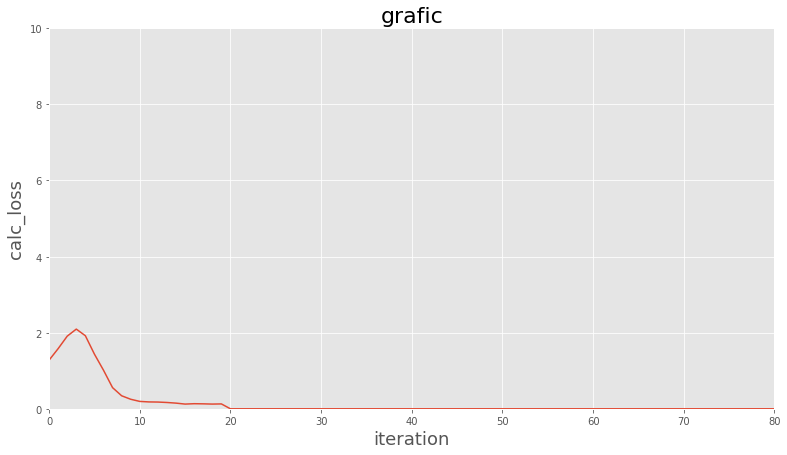

In [182]:
import pylab
fig = pylab.figure(figsize = (13, 7))
ax = fig.add_subplot(111) 
ax.plot(my_clf.result)
pylab.ylim(0, 10)
pylab.xlim(0, 80)
pylab.xlabel('iteration', size=18)
pylab.ylabel('calc_loss', size=18)
ax.set_title('grafic', size=22)

pylab.show()

In [183]:
my_clf.predict(X_test)
my_clf.score(X_test, y_test)

0.8666666666666667

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [184]:
def plot_decision_boundary(clf):
    x = np.linspace(-5, 8, num=2)
    y = -((clf.weights[0]*x+clf.weights[2])/clf.weights[1])
    plt.plot(x, y, label='{}'.format(name))
    pass

0  =  0.5432739088488063
1  =  0.5113051943736208
2  =  0.4899995968398151
3  =  0.4735330770360731
4  =  0.4698174235572574
5  =  0.47269882013266296
6  =  0.4267631151834239
7  =  0.4253194871685438
8  =  0.4225094690574959
9  =  0.4554009105040357
10  =  0.44128137984943716
11  =  0.392851173249913
12  =  0.4185532009013977
13  =  0.3924771776641206
14  =  0.37995753683480654
15  =  0.4171021112114955
16  =  0.37393234517342305
17  =  0.37131781121762075
18  =  0.3723811622764391
19  =  0.37519883587997405
20  =  0.37228174716663043
21  =  0.36566203039853895
22  =  0.36511633293484486
23  =  0.3689598668065242
24  =  0.36102283532362217
25  =  0.3632765032920656
26  =  0.3938036792618883
27  =  0.36033113200338074
28  =  0.35862327966472574
29  =  0.3592827864676537
CPU times: user 336 ms, sys: 56.8 ms, total: 393 ms
Wall time: 390 ms
0  =  0.8204219806636929
1  =  0.7926171144099319
2  =  0.7682540698872652
3  =  0.744786714562937
4  =  0.7283959781286101
5  =  0.7138819761712076


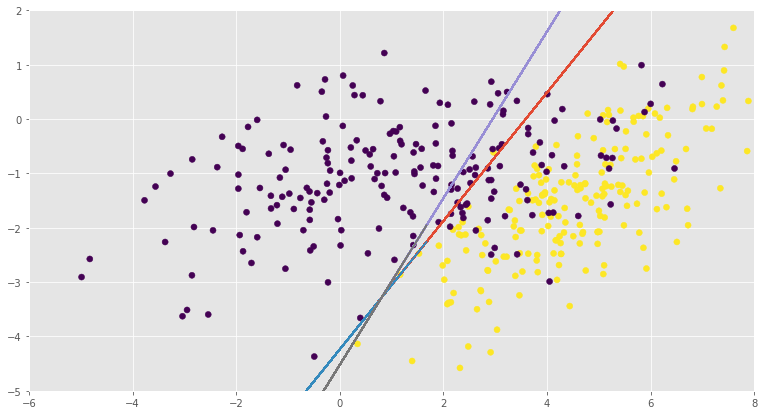

In [185]:
import pylab
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

fig = pylab.figure(figsize = (13, 7)) 

my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type='log_reg', max_epoch=30, alpha=0.8, C=200, batch_size=50, drag=1.02)
%time my_clf.fit(X, y)
plt.plot(X, -(my_clf.weights[0] + my_clf.weights[1]*X) / my_clf.weights[2])

y = y * 2 - 1

clf = MySGDClassifier(batch_generator=my_batch_generator, model_type="lin_reg", max_epoch=30, alpha=0.08, C=200, batch_size=30)
%time clf.fit(X, y)
plt.plot(X, -(clf.weights[0] + clf.weights[1]*X) / clf.weights[2])

#model_type="lin_reg", max_epoch=30, alpha=0.05, C=200, batch_size=50

pylab.ylim(-5, 2)
pylab.xlim(-6, 8)
plt.scatter(X[:,0], X[:,1], c=y)
#my_clf = MySGDClassifier(batch_generator=my_batch_generator, alpha=0.3, C=20000, batch_size=100, max_epoch=40, drag=1.1)
#my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type="log_reg", alpha=0.4, C=20000, batch_size=100, max_epoch=40, drag=1.05)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [186]:
from sklearn.datasets import make_classification

In [187]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [188]:
## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)
my_clf = MySGDClassifier(batch_generator=my_batch_generator, max_epoch=6, alpha=0.5, C=10000, batch_size=50)

In [189]:
my_clf.fit(X_train, y_train)

0  =  0.04044150420382796
1  =  0.040658897870903224
2  =  0.04052919241269165
3  =  0.04044705706275687
4  =  0.04071122758886905
5  =  0.040538381226996795


MySGDClassifier(C=10000, alpha=0.5,
                batch_generator=<function my_batch_generator at 0x122a06cb0>,
                batch_size=50, drag=1, max_epoch=6, model_type='lin_reg')

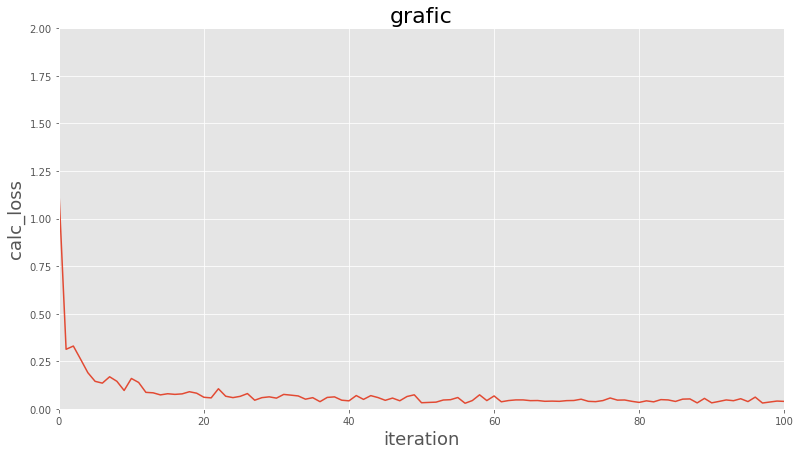

In [190]:
import pylab
fig = pylab.figure(figsize = (13, 7))
ax = fig.add_subplot(111) 
ax.plot(my_clf.result)
pylab.ylim(0, 2)
pylab.xlim(0, 100)
pylab.xlabel('iteration', size=18)
pylab.ylabel('calc_loss', size=18)
ax.set_title('grafic', size=22)

pylab.show()

In [191]:
%time my_clf.calc_loss(X_test, y_test)

CPU times: user 9.88 ms, sys: 4.03 ms, total: 13.9 ms
Wall time: 10 ms


0.04181955539469663

In [192]:
my_clf.predict(X_test)
my_clf.score(X_test, y_test)

0.986

In [193]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)
my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type='log_reg', max_epoch=1, alpha=0.05, C=200, batch_size=20, drag=1.1)

In [195]:
%time my_clf.fit(X_train, y_train)

0  =  0.18036940113317876
CPU times: user 2.27 s, sys: 42.2 ms, total: 2.31 s
Wall time: 2.33 s


MySGDClassifier(C=200, alpha=0.045454545454545456,
                batch_generator=<function my_batch_generator at 0x122a06cb0>,
                batch_size=20, drag=1.1, max_epoch=1, model_type='log_reg')

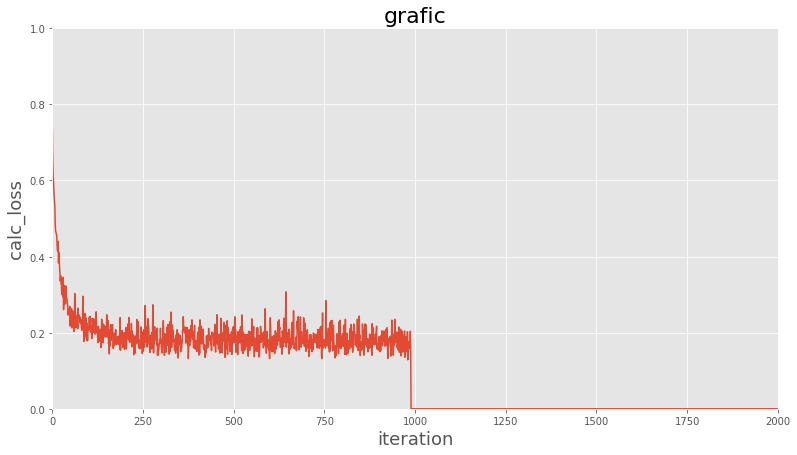

In [196]:
import pylab
fig = pylab.figure(figsize = (13, 7))
ax = fig.add_subplot(111) 
ax.plot(my_clf.result)
pylab.ylim(0, 1)
pylab.xlim(0, 2000)
pylab.xlabel('iteration', size=18)
pylab.ylabel('calc_loss', size=18)
ax.set_title('grafic', size=22)

pylab.show()
#резкое падение ошибки до нуля - конец обучения

In [197]:
%time my_clf.calc_loss(X_test, y_test)

CPU times: user 21.2 ms, sys: 3.36 ms, total: 24.6 ms
Wall time: 23.3 ms


0.17801443883157583

In [198]:
my_clf.predict(X_test)
my_clf.score(X_test, y_test)

0.943

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

In [199]:
#при изначально больших alpha ( > 1) ошибка резко увеличивается, 
#в то время как для для слишком маленьких ( < 0.01) не успевает сойтись за отведённые эпохи.
#эмперическим путём было получено что лучшую сходимость на предложенных данных наиименьшую ошибку обеспечивают
#alpha порядка 0.01 с коффициентом торможения (drag) 1.1

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

0  =  0.10503543590695431
0  =  0.20726679074392887
0  =  0.3605961195652049
0  =  0.4592672551132361
0  =  0.4910376550274325
0  =  0.4980134960652225
0  =  0.49968646460700733
0  =  0.5000327455720401
0  =  0.5000826904784869
0  =  0.5000968296630747


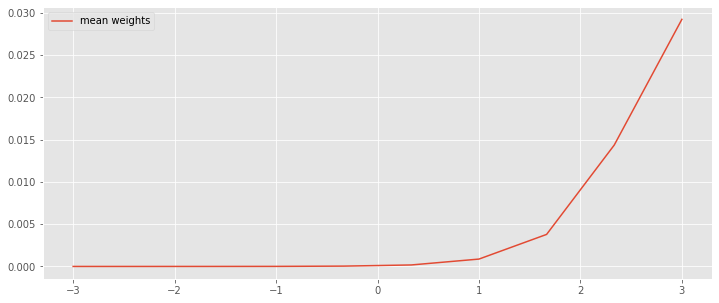

In [200]:
## Your Code Here
grafic = np.zeros(shape=len(np.logspace(3, -3, 10)))
j = 0
for i in range(len(np.logspace(3, -3, 10))):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)
    my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type='lin_reg', max_epoch=1, alpha=0.01, C=np.logspace(3, -3, 10)[i], batch_size=50, drag=1.1)
    my_clf.fit(X_train, y_train)
    grafic[i] = np.mean(my_clf.weights)

import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
x = np.linspace(3, -3, 10)
y = grafic
# Plot the data
plt.plot(x, y, label='mean weights')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [212]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [213]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [214]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [215]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [216]:
scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.mean_)
print(X_train[:10])
X_train = scaler.transform(X_train)
print(X_train[:10])

StandardScaler(copy=True, with_mean=True, with_std=True)
[3.25543199 2.62147134 2.33088109 2.13404619 1.98973482 1.87938409
 1.78887938 1.70196749 1.63378956 1.57690334 1.52788708 1.47698888
 1.43062447 1.38477331 1.33977759]
[[4 4 3 3 3 2 2 2 2 2 2 2 2 1 1]
 [8 7 7 7 7 7 4 4 3 3 2 2 2 2 2]
 [2 2 2 2 2 2 2 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 2 2 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 1 1 1 1 1 1 1 1 1]
 [4 3 2 2 2 2 2 2 2 2 2 2 2 1 1]
 [2 2 2 2 1 1 1 1 1 1 1 1 1 1 1]]
[[ 0.28851817  0.64985075  0.34754853  0.48147109  0.59175091  0.07308688
   0.13221894  0.19461288  0.24432264  0.28747714  0.32706765  0.36947476
   0.40832322 -0.2798612  -0.25235498]
 [ 1.83850779  2.06407761  2.42519734  2.70547468  2.9347037   3.10282323
   1.38476303  1.50059713  0.91148724  0.96693684  0.32706765  0.36947476
   0.40832322  0.44747927  0.49035139]
 [-0.48647664 -0.29296716 -0.17186368 -0.0745298   0.00601271  0.0730

In [217]:
X = X_train
y = y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, stratify=y)
my_clf = MySGDClassifier(batch_generator=my_batch_generator, model_type='log_reg', max_epoch=13, alpha=0.04, C=20000, batch_size = 25, drag=1.05)
#model_type='log_reg', max_epoch=30, alpha=0.5, C=20000, batch_size = 25

In [218]:
%time my_clf.fit(X_train, y_train)

0  =  0.5015005607881909
1  =  0.4850450493948088
2  =  0.481440490863407
3  =  0.48074430967988896
4  =  0.48019149058436394
5  =  0.47985526942426304
6  =  0.48007215451763
7  =  0.47972817869173906
8  =  0.47976405278358214
9  =  0.4800195571206124
10  =  0.47960667170593424
11  =  0.4795487758300855
12  =  0.47949742607713475
CPU times: user 4.13 s, sys: 214 ms, total: 4.34 s
Wall time: 4.51 s


MySGDClassifier(C=20000, alpha=0.02121285402581178,
                batch_generator=<function my_batch_generator at 0x122a06cb0>,
                batch_size=25, drag=1.05, max_epoch=13, model_type='log_reg')

In [219]:
%time my_clf.calc_loss(X_test, y_test)

CPU times: user 3.21 ms, sys: 858 µs, total: 4.07 ms
Wall time: 3.42 ms


0.5400028231081749

In [220]:
my_clf.predict(X_test)

[-1.6597391985466137,
 0.4973529483025769,
 -0.8738359816617818,
 -0.03712578540997313,
 -1.0760275955322194,
 -0.9271046289366927,
 -1.1838408553360942,
 -2.066195527777412,
 -2.4674666187963568,
 -1.6597391985466137,
 -0.8956601850266928,
 -1.1057893834588768,
 -1.5031384667284804,
 -1.3265997681031598,
 -1.6218154181274638,
 -1.6597391985466137,
 -1.2019274255390182,
 -2.4674666187963568,
 0.20866238146136729,
 -0.8392666456515877,
 -0.8359122012426317,
 -1.220544327108519,
 -0.13158117150677207,
 -0.8359122012426317,
 -1.4612816816216154,
 -1.0381038151130693,
 -1.8916926003437085,
 0.04684376367627263,
 1.3234709980419326,
 -2.445642415431446,
 -2.1708196188291202,
 -1.9240535024299386,
 -0.8577364046075429,
 -0.6208373884243674,
 1.2403363953949607,
 -1.3849682556732077,
 -1.1057893834588768,
 -1.1838408553360942,
 0.6761462487429712,
 -1.46521468630933,
 0.8763007723561601,
 -1.3854341207833152,
 1.1277710949779847,
 -1.6597391985466137,
 -0.04571570799006042,
 -0.56114125836922

In [221]:
my_clf.score(X_test, y_test)

0.7521367521367521

In [222]:
my_clf = MySGDClassifier(batch_generator=my_batch_generator, max_epoch=10, alpha=0.1, C=20000, batch_size = 1, drag=1.05)

In [223]:
%time my_clf.fit(X_train, y_train)

0  =  0.1623389819986056
1  =  0.1583283486142053
2  =  0.1575476472853597
3  =  0.15751701128221926
4  =  0.1573614469019814
5  =  0.15691945188138837
6  =  0.15714482521866102
7  =  0.15669269696216506
8  =  0.15675052767971331
9  =  0.15695218493277505
CPU times: user 2.35 s, sys: 33.2 ms, total: 2.38 s
Wall time: 2.42 s


MySGDClassifier(C=20000, alpha=0.06139132535407589,
                batch_generator=<function my_batch_generator at 0x122a06cb0>,
                batch_size=1, drag=1.05, max_epoch=10, model_type='lin_reg')

In [224]:
%time my_clf.calc_loss(X_test, y_test)

CPU times: user 900 µs, sys: 137 µs, total: 1.04 ms
Wall time: 931 µs


0.17875874388424468

In [225]:
my_clf.predict(X_test)

[0.16689246099238875,
 0.6025700487725758,
 0.3234707400723006,
 0.5102180410710064,
 0.31339977004506436,
 0.29538350261132185,
 0.24662677674593037,
 0.08591363753053194,
 0.001846584743262547,
 0.16689246099238875,
 0.3150031429030863,
 0.29506231730623733,
 0.1841449829670027,
 0.19696507407376357,
 0.18929831927966778,
 0.16689246099238875,
 0.24667591349607745,
 0.001846584743262547,
 0.5662538098066268,
 0.3121693326060333,
 0.3458765983595797,
 0.2733653720669371,
 0.4631138248137839,
 0.3458765983595797,
 0.17003436132169386,
 0.33580562833234345,
 0.13848403822632546,
 0.4888339439576122,
 0.7087929561367741,
 0.010314181912476822,
 0.05902177102772127,
 0.1435799193856973,
 0.3374090011903654,
 0.3637107320183307,
 0.7236200511539395,
 0.2446296544775887,
 0.29506231730623733,
 0.24662677674593037,
 0.6281597010629101,
 0.2065508412542818,
 0.6804932053226226,
 0.21484607789625207,
 0.8115745431112753,
 0.16689246099238875,
 0.44747578200027815,
 0.42361379184477965,
 0.0190

In [226]:
my_clf.score(X_test, y_test)

0.7777777777777778

In [227]:
import pandas as pd
train_data = pd.read_csv('test_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [228]:
import numpy as np
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target) in enumerate(docs):
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
groups_train = np.array(groups_train)
X_train[:50]

array([[ 3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1],
       [ 5,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 6,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 6,  5,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11, 10,  5,  5,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1],
       [ 2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1],
       [ 4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2],
       [ 3,  3,  2,  2,  2,  2,  2

In [229]:
scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.mean_)
print(X_train[:10])
X_train = scaler.transform(X_train)
print(X_train[:10])

StandardScaler(copy=True, with_mean=True, with_std=True)
[3.27335057 2.61688819 2.32579539 2.14404282 2.00637517 1.89571179
 1.80140735 1.71137307 1.64124617 1.57208155 1.51217899 1.45648644
 1.40867264 1.36512901 1.32375053]
[[ 3  3  2  2  2  2  2  2  2  2  2  1  1  1  1]
 [ 5  3  3  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 6  5  5  5  5  5  5  4  4  4  4  4  4  4  4]
 [ 6  5  4  4  4  4  4  3  3  3  3  3  3  3  3]
 [ 4  3  3  3  2  2  2  2  2  2  2  2  2  2  2]
 [ 3  3  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11 10  5  5  4  4  4  4  4  3  3  3  3  3  3]
 [ 1  1  1  1  1  1  1  1  0  0  0  0  0  0  0]]
[[-0.09960999  0.17383214 -0.16130939 -0.07543931 -0.00347823  0.05915747
   0.11615608  0.1763277   0.22586166  0.28046378  0.32809654 -0.31559104
  -0.28701374 -0.25952987 -0.23333124]
 [ 0.62919761  0.17383214  0.33381545 -0.07543931 -0.00347823  0.05915747
   0.11615608  0.1763277   0.225

In [230]:
import csv
my_clf.predict(X_train)
with open('sample_submission.csv', 'w') as f:
    fieldnames = ['pair_id', 'target']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    i = 11691
    for elem in my_clf.proba:
        writer.writerow({'pair_id': str(i), 'target': str(elem)})
        i += 1
f.close()

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [208]:
import pandas as pd
train_data = pd.read_csv('test_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [209]:
import numpy as np
X_test = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target) in enumerate(docs):
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_train = np.array(groups_train)


In [210]:
import csv
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)
a = my_clf.predict(X_test)
with open('submission.csv', 'w') as f:
    fieldnames = ['pair_id', 'target']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    i = 11691
    for elem in a:
        writer.writerow({'pair_id': str(i), 'target': str(elem)})
        i += 1
f.close()

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***